In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## http://bit.ly/hg-03-2

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

train_input = train_input.reshape(-1,1 )
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9161396515342868
0.9201560112497863


In [8]:
print(lr.coef_, lr.intercept_)
# coef = 기울기
# intercept = 절편 

[36.51649555] -622.2790377362376


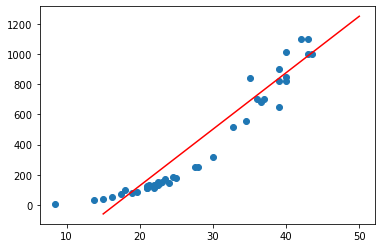

In [10]:
x_new = np.arange(15, 51)
y_new = x_new*37.48 - 622.27

plt.scatter(train_input, train_target)
plt.plot(x_new, y_new, color='r')

plt.show()

In [17]:
train_poly = np.column_stack((train_input, train_input**2))
test_poly = np.column_stack((test_input, test_input**2))

train_poly

array([[  42.  , 1764.  ],
       [  43.5 , 1892.25],
       [   8.4 ,   70.56],
       [  34.5 , 1190.25],
       [  40.  , 1600.  ],
       [  22.5 ,  506.25],
       [  15.  ,  225.  ],
       [  28.  ,  784.  ],
       [  36.5 , 1332.25],
       [  43.  , 1849.  ],
       [  40.  , 1600.  ],
       [  16.2 ,  262.44],
       [  13.7 ,  187.69],
       [  35.  , 1225.  ],
       [  22.  ,  484.  ],
       [  23.  ,  529.  ],
       [  22.5 ,  506.25],
       [  21.3 ,  453.69],
       [  22.  ,  484.  ],
       [  19.  ,  361.  ],
       [  23.5 ,  552.25],
       [  22.  ,  484.  ],
       [  27.5 ,  756.25],
       [  19.6 ,  384.16],
       [  21.  ,  441.  ],
       [  30.  ,  900.  ],
       [  39.  , 1521.  ],
       [  21.  ,  441.  ],
       [  39.  , 1521.  ],
       [  36.  , 1296.  ],
       [  43.  , 1849.  ],
       [  32.8 , 1075.84],
       [  40.  , 1600.  ],
       [  39.  , 1521.  ],
       [  22.7 ,  515.29],
       [  21.  ,  441.  ],
       [  37.  , 1369.  ],
 

In [18]:
lr = LinearRegression()

lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)
lr.score(test_poly, test_target)


0.9767467289580112

In [19]:
print(lr.coef_, lr.intercept_)

[-23.62362025   1.04990666] 144.66846018977043


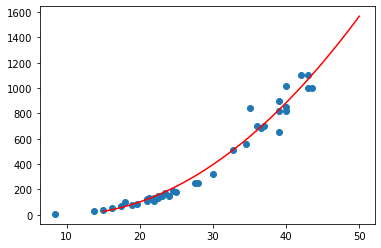

In [21]:
x_new = np.arange(15, 51)
y_new = -19*x_new + 0.97*x_new**2 + 92.7

plt.scatter(train_input, train_target)
plt.plot(x_new, y_new, color='r')

plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [24]:
poly.get_feature_names()

['x0', 'x0^2']

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)
lr.score(test_poly, test_target)

0.9767467289580112